# Computer Pointer Controller - Performance

The aim of this Python Notebook is to compare the app performance on different hardwares and with different model precisions.

Model precisions tested:
- FP32
- FP16
- INT8

Hardwares tested:
- CPU (2.3 GHz Intel Core i5)
- VPU (Neural Compute Stick 2 - only FP16 supported)

In [28]:
# Import dependencies
from IPython.display import HTML
import matplotlib.pyplot as plt

The performance has been tested using the following demo video:

In [29]:
from IPython.display import HTML

HTML("""
    <video width="860" height="415"  alt="test" controls>
        <source src="../media/demo.mp4" type="video/mp4">
    </video>
    """)

## Set up

The following functions and variables are used to create the command to run in roder to generate some performance stats. 

In [30]:
input_file = "./media/demo.mp4"

In [31]:
# Function to set the model path according to the precision (FP32/FP16/INT8) 
def set_model_path(precision):
    if precision == 'FP32':
        FACEMODELPATH="./models/intel/face-detection-adas-0001/FP32/face-detection-adas-0001"
        POSEMODELPATH="./models/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001"
        LANDMARKSMODELPATH="./models/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009"   
        GAZEMODELPATH="./models/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002" 
    elif precision == 'FP16':
        FACEMODELPATH="./models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001"
        POSEMODELPATH="./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001"
        LANDMARKSMODELPATH="./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009"   
        GAZEMODELPATH="./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002"
    elif precision == 'INT8':
        FACEMODELPATH="./models/intel/face-detection-adas-0001/FP16-INT8/face-detection-adas-0001"
        POSEMODELPATH="./models/intel/head-pose-estimation-adas-0001/FP16-INT8/head-pose-estimation-adas-0001"
        LANDMARKSMODELPATH="./models/intel/landmarks-regression-retail-0009/FP16-INT8/landmarks-regression-retail-0009"    
        GAZEMODELPATH="./models/intel/gaze-estimation-adas-0002/FP16-INT8/gaze-estimation-adas-0002"
    else:
        FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH = [], [], [], []
        raise ValueError("Specify a suitable precision: FP32, FP16 or INT8")
        
    return FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH

In [32]:
# Function to set the output for the stats file
def set_output_path(device, precision):
    output_path = "./performance/" + device + "/" + precision + ".txt"
    return output_path

In [33]:
# Function to create command to run
def create_command(device, fm, pm, lm, gm, o, i):
    if device == 'NCS2':
        device = 'MYRIAD'
    cmd = "python3 main.py -fm " + fm + " -pm " + pm + " -lm " + lm + " -gm " + gm + " -i " + i + " -o_stats " + o + " -d " + device
    return cmd
    

## CPU

Application performance on CPU.

In [34]:
device = 'CPU'

### Precision: FP32

In [35]:
# Create command to generate stats
precision = 'FP32'
FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH = set_model_path(precision)
OUTPUTSTATS = set_output_path(device, precision)

In [36]:

create_command(device, FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH, OUTPUTSTATS, input_file)

'python3 main.py -fm ./models/intel/face-detection-adas-0001/FP32/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002 -i ./media/demo.mp4 -o_stats ./performance/CPU/FP32.txt -d CPU'

### Precision: FP16

In [37]:
# Create command to generate stats
precision = 'FP16'
FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH = set_model_path(precision)
OUTPUTSTATS = set_output_path(device, precision)

In [38]:
create_command(device, FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH, OUTPUTSTATS, input_file)

'python3 main.py -fm ./models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002 -i ./media/demo.mp4 -o_stats ./performance/CPU/FP16.txt -d CPU'

### Precision: INT8

In [39]:
# Create command to generate stats
precision = 'INT8'
FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH = set_model_path(precision)
OUTPUTSTATS = set_output_path(device, precision)

In [40]:
create_command(device, FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH, OUTPUTSTATS, input_file)

'python3 main.py -fm ./models/intel/face-detection-adas-0001/FP16-INT8/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16-INT8/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16-INT8/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16-INT8/gaze-estimation-adas-0002 -i ./media/demo.mp4 -o_stats ./performance/CPU/INT8.txt -d CPU'

## NCS2

Create commands to generates stats about application perform on VPU / NCS2.

**Note:** NCS2 runs only with FP16 models.

In [41]:
device = 'NCS2'

### Precision: FP16

In [42]:
# Create command to generate stats
precision = 'FP16'
FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH = set_model_path(precision)
OUTPUTSTATS = set_output_path(device, precision)

In [43]:
create_command(device, FACEMODELPATH, POSEMODELPATH, LANDMARKSMODELPATH, GAZEMODELPATH, OUTPUTSTATS, input_file)

'python3 main.py -fm ./models/intel/face-detection-adas-0001/FP16/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002 -i ./media/demo.mp4 -o_stats ./performance/NCS2/FP16.txt -d MYRIAD'

## Analyse stats files

Run the above commands to generate the text files with stats about the application performance.
**Note**: commands need to be run from the main application directory, where the `main.py` file is located.

### CPU

Let's compare the performance of the application on the CPU.

In [44]:
# CPU performance data
precisions = ['FP32', 'FP16', 'INT8']
model_load_time=[]
inference_time=[]
fps=[]

for prec in precisions:
    stats_path = set_output_path('CPU', prec)
    stats_file = stats_path.split("/", maxsplit=2)[2]
    # Open file and get data out
    with open(stats_file, 'r') as f:
        model_load_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        inference_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        fps.append(float(f.readline().split("\n")[0].split(" ")[3]))    

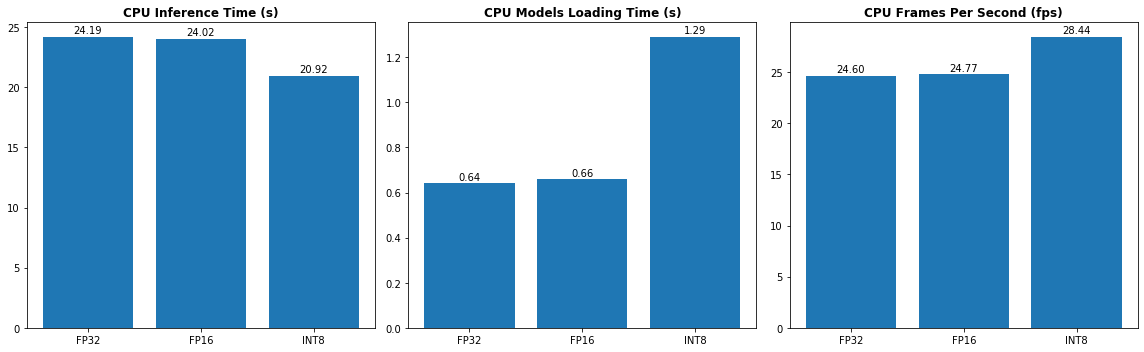

In [45]:
#  Plot data

def add_bar_labels(plot, axis):
    for value in plot:
        height = value.get_height()
        axis.text(value.get_x() + value.get_width()/2.,
             1.007*height,'%.2f' % height, ha='center', va='bottom')

fig, (ax1, ax2, ax3) =  plt.subplots(nrows=1, ncols=3, figsize=(16,5))

p1 = ax1.bar(precisions, inference_time)
ax1.set_title("CPU Inference Time (s)", fontweight='bold')
add_bar_labels(p1, ax1)

p2 = ax2.bar(precisions, model_load_time)
ax2.set_title("CPU Models Loading Time (s)", fontweight='bold')
add_bar_labels(p2, ax2)

p3 = ax3.bar(precisions, fps)
ax3.set_title("CPU Frames Per Second (fps)", fontweight='bold')
add_bar_labels(p3, ax3)

plt.tight_layout()
# plt.show()
plt.savefig("cpu_performance")

Looking at the above charts, and because face detection is a key information that we pass to the other three models, it would be recommended, when running the application on a CPU, to use a Face Detection model in Precision 32 bits and the other models in 16 bits.

The command to run is:

`
python3 main.py -fm ./models/intel/face-detection-adas-0001/FP32/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002 -i ./media/demo.mp4  -d CPU
`

and we obtain:

|Model Combination                      | Total inference time | Models loading time | Frames Per Second |
| ------------------------------------- | ------------------- | -------------------- | ----------------- |
| face-detection-adas - FP32<br>head-pose-estimation-adas - FP16<br>facial-landmarks-35-adas - FP16<br>gaze-estimation-adas - FP16|   24.24s |  0.67 | 24.57 fps |
 



### CPU vs NCS2

Let's compare the application performance on CPU and NCS2.

**Note:** NCS2 accepts only **FP16** precision models.

In [46]:
# CPU vs NCS2 performance data
device = ['CPU', 'NCS2']
precision = 'FP16'
model_load_time=[]
inference_time=[]
fps=[]

for d in device:
    stats_path = set_output_path(d, precision)
    stats_file = stats_path.split("/", maxsplit=2)[2]
    # Open file and get data out
    with open(stats_file, 'r') as f:
        model_load_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        inference_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        fps.append(float(f.readline().split("\n")[0].split(" ")[3]))  

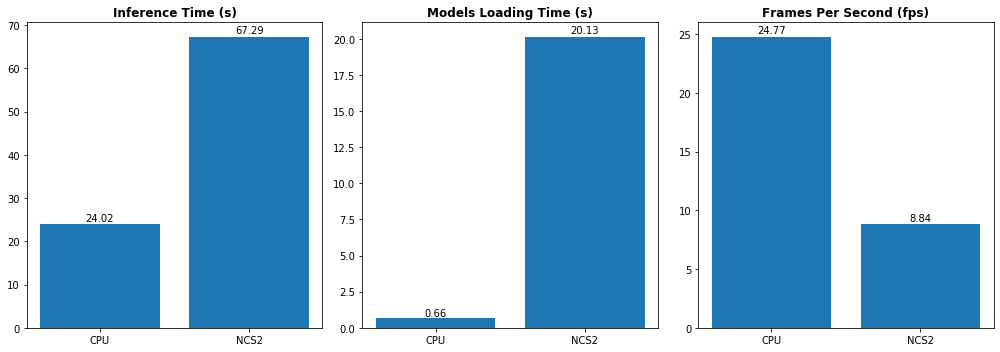

In [47]:
# Plot the data

fig, (ax1, ax2, ax3) =  plt.subplots(nrows=1, ncols=3, figsize=(14,5))

p1 = ax1.bar(device, inference_time)
ax1.set_title("Inference Time (s)", fontweight='bold')
add_bar_labels(p1, ax1)

p2 = ax2.bar(device, model_load_time)
ax2.set_title("Models Loading Time (s)", fontweight='bold')
add_bar_labels(p2, ax2)

p3 = ax3.bar(device, fps)
ax3.set_title("Frames Per Second (fps)", fontweight='bold')
add_bar_labels(p3, ax3)

plt.tight_layout()
# plt.show()
plt.savefig("ncs2_vs_cpu")

As the above charts show, the application performs better when runs on CPU. However NCS2 is sitll a valid option when space and money are a constraint to the use case.

### Async vs Sync

By default the application will run inferences in **asynchronous mode**. However, the user can add `-sync_mode` to the commands line arguments to run **synchronous inferences** instead. This will have an an effect on application performance. 

To see how async/sync inference affects the performance,  run the following two commands to generates stats in both cases.

Asynchronous:
```
python3 main.py -fm ./models/intel/face-detection-adas-0001/FP32/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002 -i ./media/demo.mp4  -d CPU -o_stats ./performance/infer_mode/async.txt
```

Synchronous:
```
python3 main.py -fm ./models/intel/face-detection-adas-0001/FP32/face-detection-adas-0001 -pm ./models/intel/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001 -lm ./models/intel/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009 -gm ./models/intel/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002 -i ./media/demo.mp4  -d CPU --sync_mode -o_stats ./performance/infer_mode/sync.txt
```


In [48]:
# Async vs Sync performance data
infer_mode = ['async', 'sync']
model_load_time=[]
inference_time=[]
fps=[]

for m in infer_mode:
    stats_path = "./performance/infer_mode/" + m + ".txt"
    stats_file = stats_path.split("/", maxsplit=2)[2]
    # Open file and get data out
    with open(stats_file, 'r') as f:
        model_load_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        inference_time.append(float(f.readline().split("\n")[0].split(" ")[4]))
        fps.append(float(f.readline().split("\n")[0].split(" ")[3]))  

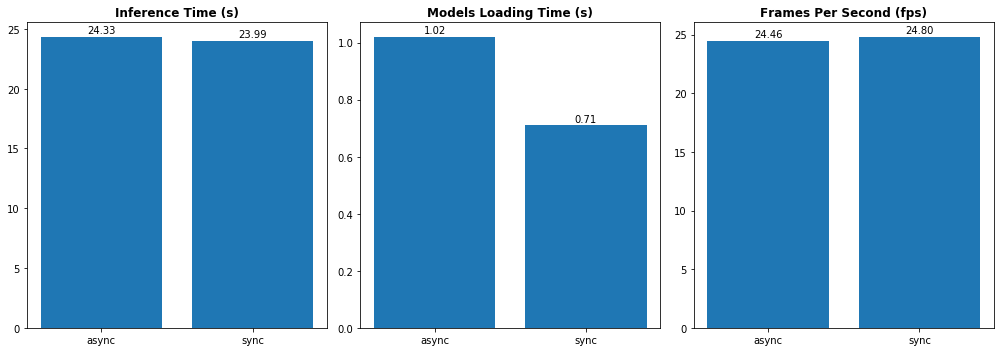

In [49]:
# Plot the data

fig, (ax1, ax2, ax3) =  plt.subplots(nrows=1, ncols=3, figsize=(14,5))

p1 = ax1.bar(infer_mode, inference_time)
ax1.set_title("Inference Time (s)", fontweight='bold')
add_bar_labels(p1, ax1)

p2 = ax2.bar(infer_mode, model_load_time)
ax2.set_title("Models Loading Time (s)", fontweight='bold')
add_bar_labels(p2, ax2)

p3 = ax3.bar(infer_mode, fps)
ax3.set_title("Frames Per Second (fps)", fontweight='bold')
add_bar_labels(p3, ax3)

plt.tight_layout()
# plt.show()
plt.savefig("async_vs_sync")

In this case there is no much difference between the two inference modes. This because asynchronous inference is highly recommended when data or service availability/connectivity are low or oversaturated with demand, which is not the case for this specific application and the way in which has been run. However, it is preferable running async inference to overcome potential problems with connectivity and demand.
